In [1]:
import json
import numpy as np
from qiskit.circuit import QuantumCircuit,QuantumRegister,ClassicalRegister
from qiskit.circuit import ParameterVector
from qiskit_aer import AerSimulator
from qiskit import transpile
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit.quantum_info import SparsePauliOp,Operator, state_fidelity, Statevector, partial_trace, entropy
import random
from scipy.optimize import minimize, differential_evolution
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Analysis of results from Picasso Supercomputer

In [2]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import json
from sklearn.metrics import confusion_matrix, roc_curve, auc

## 2 QUBIT

In [15]:
with open(r"C:\Users\aquim\TFM\2_qubit\sgm_500_de_1406_results.json", "r") as f:
    data_2sgm = json.load(f)
print(data_2sgm.keys())


dict_keys(['state0', 'state1', 'state2', 'state3', 'state4', 'state5', 'state6', 'state7', 'state8', 'state9', 'state10', 'state11', 'state12', 'state13', 'state14', 'state15', 'state16', 'state17', 'state18', 'state19', 'state20', 'state21', 'state22', 'state23', 'state24', 'state25', 'state26', 'state27', 'state28', 'state29', 'state30', 'state31', 'state32', 'state33', 'state34', 'state35', 'state36', 'state37', 'state38', 'state39', 'state40', 'state41', 'state42', 'state43', 'state44', 'state45', 'state46', 'state47', 'state48', 'state49', 'state50', 'state51', 'state52', 'state53', 'state54', 'state55', 'state56', 'state57', 'state58', 'state59', 'state60', 'state61', 'state62', 'state63', 'state64', 'state65', 'state66', 'state67', 'state68', 'state69', 'state70', 'state71', 'state72', 'state73', 'state74', 'state75', 'state76', 'state77', 'state78', 'state79', 'state80', 'state81', 'state82', 'state83', 'state84', 'state85', 'state86', 'state87', 'state88', 'state89', 'state90'

In [16]:
len(data_2sgm["results"])

500

In [17]:
entanglement_measure = [1- p for p in data_2sgm["results"]]
sep = []
separable = []; bell_state = []; non_max_entangled = [];entanglement_label1=[];fid=[];fid_sep=[];fid_bell=[];fid_non_max=[]
for i in range(len(data_2sgm["results"])):
    if data_2sgm["state"+str(i)]["state_type"]=='separable':
        fid_sep.append(data_2sgm["results"][i])
        fid.append(data_2sgm["results"][i])
        separable.append(entanglement_measure[i])
        entanglement_label1.append(0)
        sep.append(0)
    elif data_2sgm["state"+str(i)]["state_type"]=='bell_state':
        fid_bell.append(data_2sgm["results"][i])
        fid.append(data_2sgm["results"][i])
        bell_state.append(entanglement_measure[i])
        entanglement_label1.append(2)
        sep.append(1)
    elif data_2sgm["state"+str(i)]["state_type"]=='non_max_entangled':
        fid_non_max.append(data_2sgm["results"][i])
        fid.append(data_2sgm["results"][i])
        non_max_entangled.append(entanglement_measure[i])
        entanglement_label1.append(1)
        sep.append(1)
    else:
        print('Error: Unknown state type')
        continue
print(f'Separable entanglement measure: {np.mean(separable)} +- {np.std(separable)}')
print(f'Bell state entanglement measure: {np.mean(bell_state)} +- {np.std(bell_state)}')
print(f'Non maximal entangled state entanglement measure: {np.mean(non_max_entangled)} +- {np.std(non_max_entangled)}')

Separable entanglement measure: 0.3075478196130726 +- 0.0030625275500729206
Bell state entanglement measure: 0.9991007972604649 +- 0.005926177363679483
Non maximal entangled state entanglement measure: 0.5780206438619271 +- 0.15464978345739064


In [18]:
min(separable)

0.29515959253175617

In [19]:
max(separable)

0.31574858421776

In [20]:
min(non_max_entangled)

0.30862455930225585

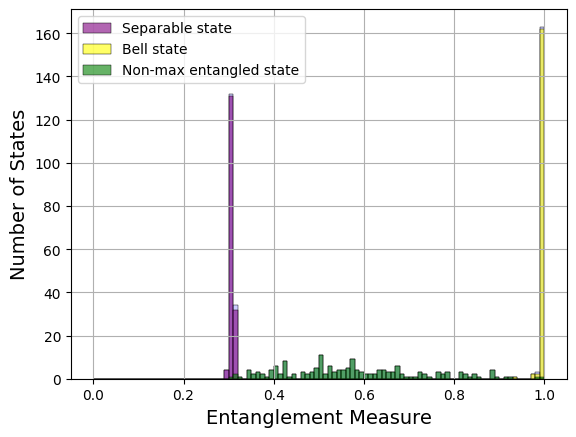

In [21]:
bin_width = 0.01
bins = np.arange(0, 1.01, bin_width)

# Create the histogram using seaborn
sns.histplot(entanglement_measure, bins=bins, kde=False, edgecolor='black', color='blue', alpha=0.2)
#sns.histplot(w, bins=bins, kde=False, edgecolor='black', color='red', alpha=0.6,label='W')
#sns.histplot(ghz_local_op, bins=bins, kde=False, edgecolor='black', color='green', alpha=0.6,label='GHZ')
#sns.histplot(bipartite_entangled, bins=bins, kde=False, edgecolor='black', color='orange', alpha=0.6,label='bipartite entangled')
sns.histplot(separable, bins=bins, kde=False, edgecolor='black', color='purple', alpha=0.6,label='Separable state')
sns.histplot(bell_state, bins=bins, kde=False, edgecolor='black', color='yellow', alpha=0.6,label='Bell state')
sns.histplot(non_max_entangled, bins=bins, kde=False, edgecolor='black', color='green', alpha=0.6,label='Non-max entangled state')
# Add labels and title
plt.xlabel('Entanglement Measure', fontsize=14)
plt.ylabel('Number of States', fontsize=14)
plt.legend()
# Show the plot
plt.grid(True)
plt.savefig(r'C:\Users\aquim\TFM\2_qubit\2q_entanglement_histogram_sgm_final.png', dpi=300, bbox_inches='tight')

{'state0': {'state_type': 'separable'},
 'state1': {'state_type': 'bell_state'},
 'state2': {'state_type': 'non_max_entangled'},
 'state3': {'state_type': 'separable'},
 'state4': {'state_type': 'bell_state'},
 'state5': {'state_type': 'non_max_entangled'},
 'state6': {'state_type': 'separable'},
 'state7': {'state_type': 'bell_state'},
 'state8': {'state_type': 'non_max_entangled'},
 'state9': {'state_type': 'separable'},
 'state10': {'state_type': 'bell_state'},
 'state11': {'state_type': 'non_max_entangled'},
 'state12': {'state_type': 'separable'},
 'state13': {'state_type': 'bell_state'},
 'state14': {'state_type': 'non_max_entangled'},
 'state15': {'state_type': 'separable'},
 'state16': {'state_type': 'bell_state'},
 'state17': {'state_type': 'non_max_entangled'},
 'state18': {'state_type': 'separable'},
 'state19': {'state_type': 'bell_state'},
 'state20': {'state_type': 'non_max_entangled'},
 'state21': {'state_type': 'separable'},
 'state22': {'state_type': 'bell_state'},
 's

In [24]:
q=0
for i in range(len(separable)):
    if separable[i] > 0.3086:
        q+=1
print(f'Number of separable states with entanglement measure > 0.3086 {q}')

Number of separable states with entanglement measure > 0.3086 59


In [39]:
q=0
for i in range(len(non_max_entangled)):
    if non_max_entangled[i] < 0.3186:
        q+=1
print(f'Number of separable states with entanglement measure > 0.3086 {q}')

Number of separable states with entanglement measure > 0.3086 2


In [ ]:
def clasificar(valor):
    if 0 <= valor <= 0.3186:
        return 0  # Separa6ble
    elif 0.928 <= valor <= 1.0:
        return 1  # Bell
    elif 0.3186< valor < 0.928:
        return 2  # Non-maximal entangled
def clasificar2(valor):
    if 0 <= valor <= 0.3186:
        return 0  # Separable
    elif 0.3186 < valor <=1:
        return 1
etiquetas_predichas = [clasificar(v) for v in entanglement_measure]
separability_label = [clasificar2(v) for v in entanglement_measure]
correctos = sum([1 for real, pred in zip(entanglement_label1, etiquetas_predichas) if real == pred])
fallidos = sum([1 for real, pred in zip(entanglement_label1, etiquetas_predichas) if real != pred])
print(f'Fallidos: {fallidos}')
correctos2 = sum([1 for real, pred in zip(sep, separability_label) if real == pred])
print(f'Accuracy of serpable/non-max-entangled/max-entangled: {correctos / len(entanglement_measure) * 100}%')
print(f'Separability accuracy: {correctos2 / len(sep) * 100}%')


Fallidos: 4
Accuracy of serpable/non-max-entangled/max-entangled: 99.2%
Separability accuracy: 99.6%


In [ ]:
label = [];q=0
for i in range(500):
    if entanglement_measure[i] < 0.3186:
        label.append(0)
    else:
        label.append(1)
    if label[i] == sep[i]:
        q+=1

In [43]:
label2 = [];q=0
for i in range(500):
    if entanglement_measure[i] < 0.3186:
        label2.append(0)
    elif 0.928 <= entanglement_measure[i] <= 1.0:
        label2.append(2)  # Bell
    elif 0.3186< entanglement_measure[i] < 0.928:
        label2.append(1)

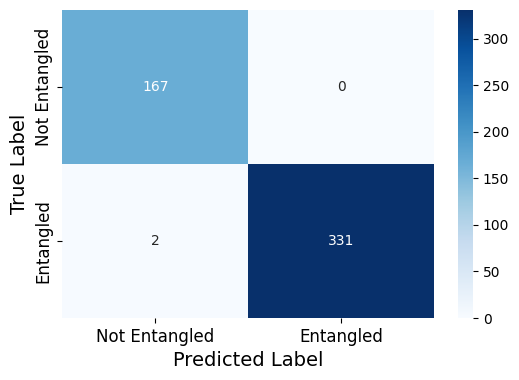

In [12]:
cm = confusion_matrix(sep, label)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Entangled', 'Entangled'],
            yticklabels=['Not Entangled', 'Entangled'])
plt.tick_params(axis='both', labelsize=12)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.savefig(r'C:\Users\aquim\TFM\2_qubit\2q_conf_matrix_sgem.png', dpi=300, bbox_inches='tight')

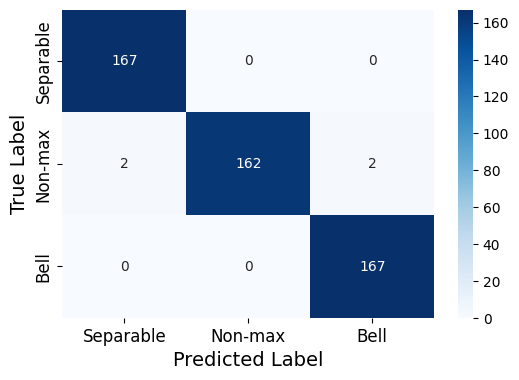

In [46]:
cm = confusion_matrix(entanglement_label1, label2)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Separable', 'Non-max', 'Bell'],
            yticklabels=['Separable', 'Non-max', 'Bell'])
plt.tick_params(axis='both', labelsize=12)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.savefig(r'C:\Users\aquim\TFM\2_qubit\2q_conf_matrix_sgem_entclas.png', dpi=300, bbox_inches='tight')

In [9]:
norm = np.sqrt(1-1/np.sqrt(2))
sgm_sep_th = 1 - (1/norm)*np.sqrt((1 - 1/np.sqrt(2)))
sgm_maxent_th = 1 - (1/norm)*np.sqrt(1 - (np.sqrt(0.5)+np.sqrt(0.5))/np.sqrt(2))
print(f'Separable state threshold: {sgm_sep_th}')
print(f'Maximally entangled state threshold: {sgm_maxent_th}')

Separable state threshold: 0.0
Maximally entangled state threshold: 1.0


In [14]:
with open(r"C:\Users\aquim\TFM\2_qubit\500_states_corrected.json", "r") as f:
    data_2 = json.load(f)
print(data_2.keys())

dict_keys(['state0', 'state1', 'state2', 'state3', 'state4', 'state5', 'state6', 'state7', 'state8', 'state9', 'state10', 'state11', 'state12', 'state13', 'state14', 'state15', 'state16', 'state17', 'state18', 'state19', 'state20', 'state21', 'state22', 'state23', 'state24', 'state25', 'state26', 'state27', 'state28', 'state29', 'state30', 'state31', 'state32', 'state33', 'state34', 'state35', 'state36', 'state37', 'state38', 'state39', 'state40', 'state41', 'state42', 'state43', 'state44', 'state45', 'state46', 'state47', 'state48', 'state49', 'state50', 'state51', 'state52', 'state53', 'state54', 'state55', 'state56', 'state57', 'state58', 'state59', 'state60', 'state61', 'state62', 'state63', 'state64', 'state65', 'state66', 'state67', 'state68', 'state69', 'state70', 'state71', 'state72', 'state73', 'state74', 'state75', 'state76', 'state77', 'state78', 'state79', 'state80', 'state81', 'state82', 'state83', 'state84', 'state85', 'state86', 'state87', 'state88', 'state89', 'state90'

In [15]:
entanglement_measure = [1-p**2 for p in data_2["results"]]
separable = []; bell_state = []; non_max_entangled = [];entanglement_label=[]
for i in range(500):
    if data_2["state"+str(i)]["state_type"]=='separable':
        separable.append(entanglement_measure[i])
        entanglement_label.append(0)
    elif data_2["state"+str(i)]["state_type"]=='bell_state':
        bell_state.append(entanglement_measure[i])
        entanglement_label.append(2)
    elif data_2["state"+str(i)]["state_type"]=='non_max_entangled':
        non_max_entangled.append(entanglement_measure[i])
        entanglement_label.append(1)
    else:
        print('Error: Unknown state type')
        continue
print(f'Separable entanglement measure: {np.mean(separable)} +- {np.std(separable)}')
print(f'Bell state entanglement measure: {np.mean(bell_state)} +- {np.std(bell_state)}')
print(f'Non maximal entangled state entanglement measure: {np.mean(non_max_entangled)} +- {np.std(non_max_entangled)}')

Separable entanglement measure: 0.011635723228226164 +- 0.012045266479525156
Bell state entanglement measure: 0.7526834895101826 +- 0.014894215107574275
Non maximal entangled state entanglement measure: 0.2860482442574423 +- 0.21730821778352133


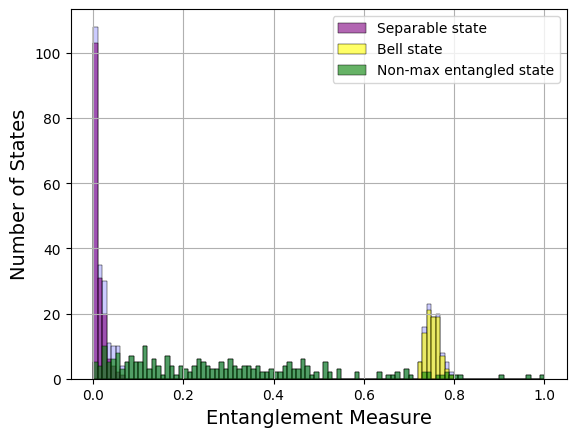

In [16]:
bin_width = 0.01
bins = np.arange(0, 1.01, bin_width)

# Create the histogram using seaborn
sns.histplot(entanglement_measure, bins=bins, kde=False, edgecolor='black', color='blue', alpha=0.2)
#sns.histplot(w, bins=bins, kde=False, edgecolor='black', color='red', alpha=0.6,label='W')
#sns.histplot(ghz_local_op, bins=bins, kde=False, edgecolor='black', color='green', alpha=0.6,label='GHZ')
#sns.histplot(bipartite_entangled, bins=bins, kde=False, edgecolor='black', color='orange', alpha=0.6,label='bipartite entangled')
sns.histplot(separable, bins=bins, kde=False, edgecolor='black', color='purple', alpha=0.6,label='Separable state')
sns.histplot(bell_state, bins=bins, kde=False, edgecolor='black', color='yellow', alpha=0.6,label='Bell state')
sns.histplot(non_max_entangled, bins=bins, kde=False, edgecolor='black', color='green', alpha=0.6,label='Non-max entangled state')
# Add labels and title
plt.xlabel('Entanglement Measure', fontsize=14)
plt.ylabel('Number of States', fontsize=14)
plt.legend()
# Show the plot
plt.grid(True)
#plt.savefig(r'C:\Users\aquim\TFM\2_qubit\2q_entanglement_histogram.png', dpi=300, bbox_inches='tight')

In [17]:
label = [];q=0
for i in range(500):
    if entanglement_measure[i] < 0.040:
        label.append(0)
    else:
        label.append(1)
    if label[i] == entanglement_label[i]:
        q+=1
    else:
        print(f'Error: {i} - {data_2["state"+str(i)]["state_type"]} - {entanglement_measure[i]} - {entanglement_label[i]}')
print(f'Accuracy: {(q/500)*100}%')

Error: 0 - bell_state - 0.7821006774902344 - 2
Error: 1 - bell_state - 0.734130859375 - 2
Error: 5 - bell_state - 0.7431173324584961 - 2
Error: 7 - non_max_entangled - 0.032927513122558594 - 1
Error: 14 - bell_state - 0.7596702575683594 - 2
Error: 20 - separable - 0.050136566162109375 - 0
Error: 21 - bell_state - 0.7682104110717773 - 2
Error: 22 - non_max_entangled - 0.0233001708984375 - 1
Error: 29 - non_max_entangled - 0.003902435302734375 - 1
Error: 30 - bell_state - 0.7361412048339844 - 2
Error: 31 - non_max_entangled - 0.009741783142089844 - 1
Error: 33 - bell_state - 0.7371435165405273 - 2
Error: 34 - bell_state - 0.7470617294311523 - 2
Error: 36 - non_max_entangled - 0.025229454040527344 - 1
Error: 39 - bell_state - 0.7615814208984375 - 2
Error: 44 - bell_state - 0.7290716171264648 - 2
Error: 46 - bell_state - 0.765380859375 - 2
Error: 50 - bell_state - 0.7460784912109375 - 2
Error: 54 - non_max_entangled - 0.005850791931152344 - 1
Error: 58 - non_max_entangled - 0.0271568298339

In [18]:
label2 = [];q=0
for i in range(500):
    if entanglement_measure[i] < 0.04:
        label2.append(0)
    elif 0.725 <= entanglement_measure[i] <= 0.785:
        label2.append(2)  # Bell
    else:
        label2.append(1)

In [19]:
for i in range(500):
    if label2[i] == entanglement_label[i]:
        q+=1
print(f'Accuracy: {(q/500)*100}%')

Accuracy: 92.0%


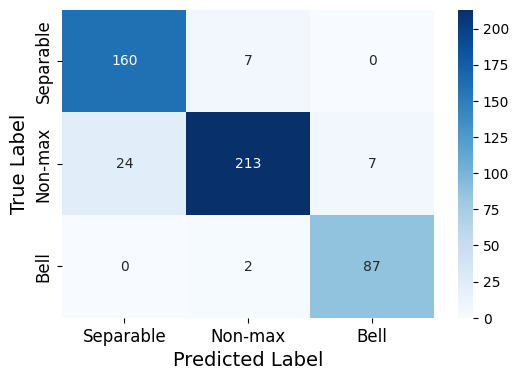

In [20]:
cm = confusion_matrix(entanglement_label, label2)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Separable', 'Non-max', 'Bell'],
            yticklabels=['Separable', 'Non-max', 'Bell'])
plt.tick_params(axis='both', labelsize=12)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.savefig(r'C:\Users\aquim\TFM\2_qubit\2q_conf_matrix_gem_entclas.png', dpi=300, bbox_inches='tight')

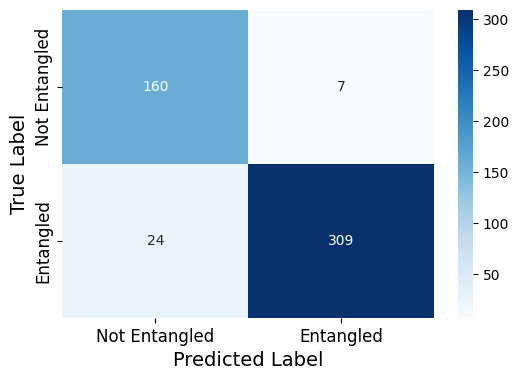

In [16]:
cm = confusion_matrix(entanglement_label, label)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Entangled', 'Entangled'],
            yticklabels=['Not Entangled', 'Entangled'])
plt.tick_params(axis='both', labelsize=12)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.savefig(r'C:\Users\aquim\TFM\2_qubit\2q_conf_matrix_gme.png', dpi=300, bbox_inches='tight')

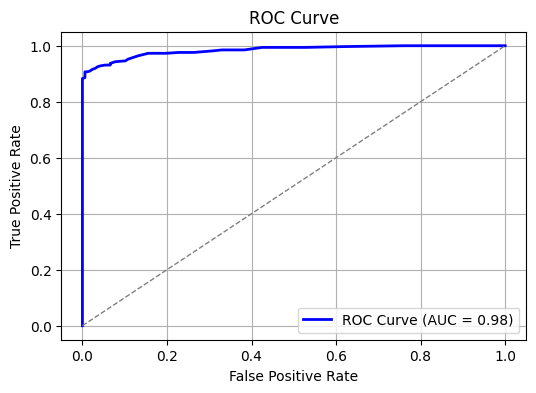

In [12]:
fpr, tpr, thresholds = roc_curve(entanglement_label, entanglement_measure)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.savefig(r'C:\Users\aquim\TFM\2_qubit\2q_roc.png', dpi=300, bbox_inches='tight')

## 3 QUBIT

In [9]:
with open(r"C:\Users\aquim\TFM\3_qubit\2206\cobyla\500_states_reesultdict.json", "r") as f:
    data = json.load(f)
print(data["state3"])

W_state


In [10]:
entanglement_measure = [1-p for p in data["results"]]
separable = []; w = []; ghz = [];bipartite_entangled = []
real_entanglement = []; entanglement_label = []
for i in range(500):
    if data["state"+str(i)]=='separable':
        separable.append(entanglement_measure[i])
        real_entanglement.append(entanglement_measure[i])
        entanglement_label.append(0)
    elif data["state"+str(i)]=='W_state':
        w.append(entanglement_measure[i])
        real_entanglement.append(entanglement_measure[i])
        entanglement_label.append(1)
    elif data["state"+str(i)]=='GHZ':
        ghz.append(entanglement_measure[i])
        real_entanglement.append(entanglement_measure[i])
        entanglement_label.append(1)
    elif data["state"+str(i)]=='bipartite_entangled':
        bipartite_entangled.append(entanglement_measure[i])
        real_entanglement.append(entanglement_measure[i])
        entanglement_label.append(1)
    else:
        print('Error: Unknown state type')
        continue
print(f'Separable entanglement measure: {np.mean(separable)} +- {np.std(separable)}')
print(f'W entanglement measure: {np.mean(w)} +- {np.std(w)}')
print(f'GHZ entanglement measure: {np.mean(ghz)} +- {np.std(ghz)}')
print(f'bipartite_entangled entanglement measure: {np.mean(bipartite_entangled)} +- {np.std(bipartite_entangled)}')

Separable entanglement measure: 0.006587200000000001 +- 0.029353773116245208
W entanglement measure: 0.20988479999999998 +- 0.15489392347332412
GHZ entanglement measure: 0.13708959999999998 +- 0.16108082235896362
bipartite_entangled entanglement measure: 0.5174448000000001 +- 0.02658693650949654


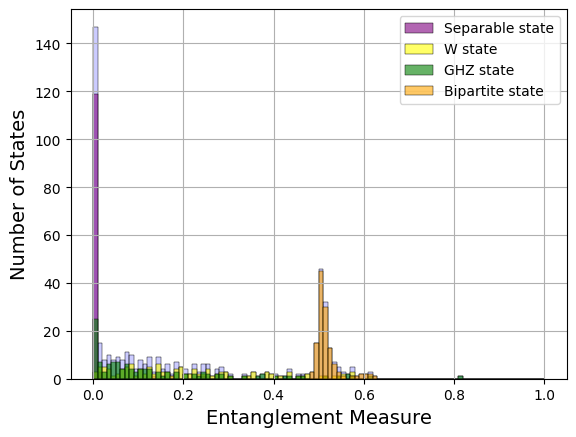

In [11]:
bin_width = 0.01
bins = np.arange(0, 1.01, bin_width)

# Create the histogram using seaborn
sns.histplot(entanglement_measure, bins=bins, kde=False, edgecolor='black', color='blue', alpha=0.2)
#sns.histplot(w, bins=bins, kde=False, edgecolor='black', color='red', alpha=0.6,label='W')
#sns.histplot(ghz_local_op, bins=bins, kde=False, edgecolor='black', color='green', alpha=0.6,label='GHZ')
#sns.histplot(bipartite_entangled, bins=bins, kde=False, edgecolor='black', color='orange', alpha=0.6,label='bipartite entangled')
sns.histplot(separable, bins=bins, kde=False, edgecolor='black', color='purple', alpha=0.6,label='Separable state')
sns.histplot(w, bins=bins, kde=False, edgecolor='black', color='yellow', alpha=0.6,label='W state')
sns.histplot(ghz, bins=bins, kde=False, edgecolor='black', color='green', alpha=0.6,label='GHZ state')
sns.histplot(bipartite_entangled, bins=bins, kde=False, edgecolor='black', color='orange', alpha=0.6,label='Bipartite state')
# Add labels and title
plt.xlabel('Entanglement Measure', fontsize=14)
plt.ylabel('Number of States', fontsize=14)
plt.legend()
# Show the plot
plt.grid(True)
plt.savefig(r'C:\Users\aquim\TFM\3_qubit\2206\cobyla\3q_entanglement_histogram_final.png', dpi=300, bbox_inches='tight')

In [25]:
label3 = [];q=0
for i in range(500):
    if entanglement_measure[i] < 0.01:
        label3.append(0)
    else:
        label3.append(1)

In [26]:
for i in range(500):
    if label3[i] == entanglement_label[i]:
        q+=1
print(f'Accuracy: {(q/500)*100}%')

Accuracy: 93.2%


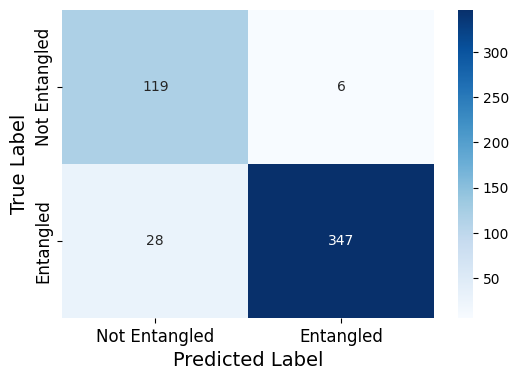

In [28]:
cm = confusion_matrix(entanglement_label, label3)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Entangled', 'Entangled'],
            yticklabels=['Not Entangled', 'Entangled'])
plt.tick_params(axis='both', labelsize=12)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.savefig(r'C:\Users\aquim\TFM\3_qubit\3q_conf_matrix_gme.png', dpi=300, bbox_inches='tight')

In [12]:
with open(r"C:\Users\aquim\TFM\3_qubit\2206\sgm_de_results_bien", "r") as f:
    data = json.load(f)
print(data.keys())

dict_keys(['state0', 'state1', 'state2', 'state3', 'state4', 'state5', 'state6', 'state7', 'state8', 'state9', 'state10', 'state11', 'state12', 'state13', 'state14', 'state15', 'state16', 'state17', 'state18', 'state19', 'state20', 'state21', 'state22', 'state23', 'state24', 'state25', 'state26', 'state27', 'state28', 'state29', 'state30', 'state31', 'state32', 'state33', 'state34', 'state35', 'state36', 'state37', 'state38', 'state39', 'state40', 'state41', 'state42', 'state43', 'state44', 'state45', 'state46', 'state47', 'state48', 'state49', 'state50', 'state51', 'state52', 'state53', 'state54', 'state55', 'state56', 'state57', 'state58', 'state59', 'state60', 'state61', 'state62', 'state63', 'state64', 'state65', 'state66', 'state67', 'state68', 'state69', 'state70', 'state71', 'state72', 'state73', 'state74', 'state75', 'state76', 'state77', 'state78', 'state79', 'state80', 'state81', 'state82', 'state83', 'state84', 'state85', 'state86', 'state87', 'state88', 'state89', 'state90'

In [13]:
entanglement_measure = [1-p for p in data["results"]]
separable = []; w = []; ghz = [];bipartite_entangled = []
real_entanglement = []; entanglement_label = []
for i in range(500):
    if data["state"+str(i)]["state_type"]=='separable_state':
        separable.append(entanglement_measure[i])
        real_entanglement.append(entanglement_measure[i])
        entanglement_label.append(0)
    elif data["state"+str(i)]["state_type"]=='w_state':
        w.append(entanglement_measure[i])
        real_entanglement.append(entanglement_measure[i])
        entanglement_label.append(1)
    elif data["state"+str(i)]["state_type"]=='ghz_state':
        ghz.append(entanglement_measure[i])
        real_entanglement.append(entanglement_measure[i])
        entanglement_label.append(1)
    elif data["state"+str(i)]["state_type"]=='bipartite_state':
        bipartite_entangled.append(entanglement_measure[i])
        real_entanglement.append(entanglement_measure[i])
        entanglement_label.append(1)
    else:
        print('Error: Unknown state type')
        continue
print(f'Separable entanglement measure: {np.mean(separable)} +- {np.std(separable)}')
print(f'W entanglement measure: {np.mean(w)} +- {np.std(w)}')
print(f'GHZ entanglement measure: {np.mean(ghz)} +- {np.std(ghz)}')
print(f'bipartite_entangled entanglement measure: {np.mean(bipartite_entangled)} +- {np.std(bipartite_entangled)}')

Separable entanglement measure: 0.2662760727686363 +- 0.04083624135721197
W entanglement measure: 0.3295212890104956 +- 0.06617475432408215
GHZ entanglement measure: 0.3078254475375366 +- 0.10441450533038281
bipartite_entangled entanglement measure: 0.2859942900809757 +- 0.007889626292179167


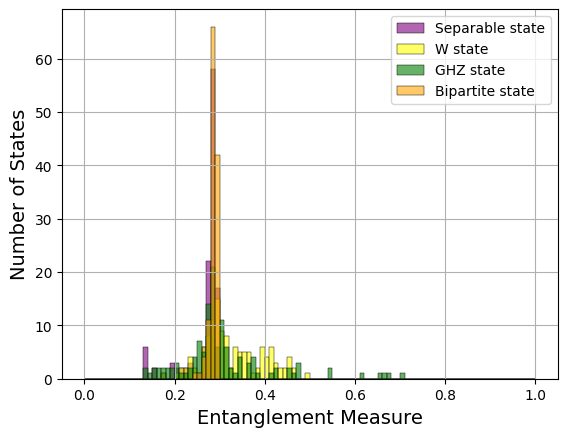

In [14]:
bin_width = 0.01
bins = np.arange(0, 1.01, bin_width)

# Create the histogram using seaborn
#sns.histplot(entanglement_measure, bins=bins, kde=False, edgecolor='black', color='blue', alpha=0.2)
#sns.histplot(w, bins=bins, kde=False, edgecolor='black', color='red', alpha=0.6,label='W')
#sns.histplot(ghz_local_op, bins=bins, kde=False, edgecolor='black', color='green', alpha=0.6,label='GHZ')
#sns.histplot(bipartite_entangled, bins=bins, kde=False, edgecolor='black', color='orange', alpha=0.6,label='bipartite entangled')
sns.histplot(separable, bins=bins, kde=False, edgecolor='black', color='purple', alpha=0.6,label='Separable state')
sns.histplot(w, bins=bins, kde=False, edgecolor='black', color='yellow', alpha=0.6,label='W state')
sns.histplot(ghz, bins=bins, kde=False, edgecolor='black', color='green', alpha=0.6,label='GHZ state')
sns.histplot(bipartite_entangled, bins=bins, kde=False, edgecolor='black', color='orange', alpha=0.6,label='Bipartite state')
# Add labels and title
plt.xlabel('Entanglement Measure', fontsize=14)
plt.ylabel('Number of States', fontsize=14)
plt.legend()
# Show the plot
plt.grid(True)
plt.savefig(r'C:\Users\aquim\TFM\3_qubit\2206\sgm_de_3q_entanglement_histogram_final.png', dpi=300, bbox_inches='tight')

In [4]:
with open(r"C:\Users\aquim\TFM\3_qubit\2206\500_cobyla2_haar\500_states_reesultdict.json", "r") as f:
    data = json.load(f)
print(data)

{'state0': 'GHZ', 'state1': 'separable', 'state2': 'bipartite_entangled', 'state3': 'W_state', 'state4': 'GHZ', 'state5': 'separable', 'state6': 'bipartite_entangled', 'state7': 'W_state', 'state8': 'GHZ', 'state9': 'separable', 'state10': 'bipartite_entangled', 'state11': 'W_state', 'state12': 'GHZ', 'state13': 'separable', 'state14': 'bipartite_entangled', 'state15': 'W_state', 'state16': 'GHZ', 'state17': 'separable', 'state18': 'bipartite_entangled', 'state19': 'W_state', 'state20': 'GHZ', 'state21': 'separable', 'state22': 'bipartite_entangled', 'state23': 'W_state', 'state24': 'GHZ', 'state25': 'separable', 'state26': 'bipartite_entangled', 'state27': 'W_state', 'state28': 'GHZ', 'state29': 'separable', 'state30': 'bipartite_entangled', 'state31': 'W_state', 'state32': 'GHZ', 'state33': 'separable', 'state34': 'bipartite_entangled', 'state35': 'W_state', 'state36': 'GHZ', 'state37': 'separable', 'state38': 'bipartite_entangled', 'state39': 'W_state', 'state40': 'GHZ', 'state41': 

In [8]:
entanglement_measure = [1-p for p in data["results"]]
separable = []; w = []; ghz = [];bipartite_entangled = []
real_entanglement = []; entanglement_label = []
for i in range(500):
    if data["state"+str(i)]=='separable':
        separable.append(entanglement_measure[i])
        real_entanglement.append(entanglement_measure[i])
        entanglement_label.append(0)
    elif data["state"+str(i)]=='W_state':
        w.append(entanglement_measure[i])
        real_entanglement.append(entanglement_measure[i])
        entanglement_label.append(1)
    elif data["state"+str(i)]=='GHZ':
        ghz.append(entanglement_measure[i])
        real_entanglement.append(entanglement_measure[i])
        entanglement_label.append(1)
    elif data["state"+str(i)]=='bipartite_entangled':
        bipartite_entangled.append(entanglement_measure[i])
        real_entanglement.append(entanglement_measure[i])
        entanglement_label.append(1)
    else:
        print('Error: Unknown state type')
        continue
print(f'Separable entanglement measure: {np.mean(separable)} +- {np.std(separable)}')
print(f'W entanglement measure: {np.mean(w)} +- {np.std(w)}')
print(f'GHZ entanglement measure: {np.mean(ghz)} +- {np.std(ghz)}')
print(f'bipartite_entangled entanglement measure: {np.mean(bipartite_entangled)} +- {np.std(bipartite_entangled)}')

Separable entanglement measure: 0.008190399999999999 +- 0.019609383158070013
W entanglement measure: 0.1864608 +- 0.1439667455468797
GHZ entanglement measure: 0.09432 +- 0.11679510674681537
bipartite_entangled entanglement measure: 0.5181136000000002 +- 0.02194241680034358


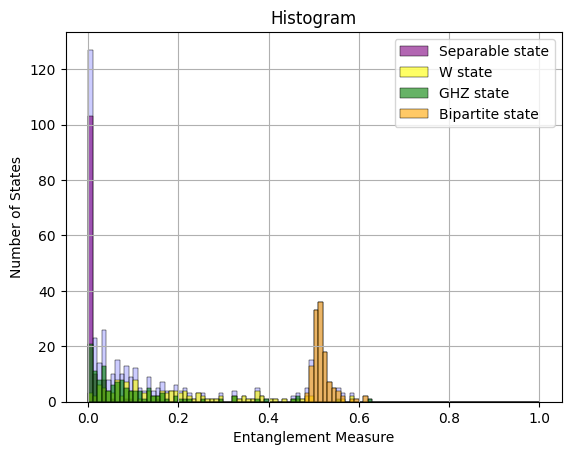

In [10]:
bin_width = 0.01
bins = np.arange(0, 1.01, bin_width)

# Create the histogram using seaborn
sns.histplot(entanglement_measure, bins=bins, kde=False, edgecolor='black', color='blue', alpha=0.2)
#sns.histplot(w, bins=bins, kde=False, edgecolor='black', color='red', alpha=0.6,label='W')
#sns.histplot(ghz_local_op, bins=bins, kde=False, edgecolor='black', color='green', alpha=0.6,label='GHZ')
#sns.histplot(bipartite_entangled, bins=bins, kde=False, edgecolor='black', color='orange', alpha=0.6,label='bipartite entangled')
sns.histplot(separable, bins=bins, kde=False, edgecolor='black', color='purple', alpha=0.6,label='Separable state')
sns.histplot(w, bins=bins, kde=False, edgecolor='black', color='yellow', alpha=0.6,label='W state')
sns.histplot(ghz, bins=bins, kde=False, edgecolor='black', color='green', alpha=0.6,label='GHZ state')
sns.histplot(bipartite_entangled, bins=bins, kde=False, edgecolor='black', color='orange', alpha=0.6,label='Bipartite state')
# Add labels and title
plt.xlabel('Entanglement Measure')
plt.ylabel('Number of States')
plt.title('Histogram')
plt.legend()
# Show the plot
plt.grid(True)

In [23]:
label = [];q=0
for i in range(500):
    if real_entanglement[i] < 0.065:
        label.append(0)
    else:
        label.append(1)
    if label[i] == entanglement_label[i]:
        q+=1
    else:
        print(f'Error: {i} - {data["state"+str(i)]["state_type"]} - {real_entanglement[i]} - {entanglement_label[i]}')
print(f'Accuracy: {(q/500)*100}%')

Error: 5 - GHZ_Local_Op - 0.0615234375 - 1
Error: 11 - GHZ_Local_Op - 0.009741783142089844 - 1
Error: 14 - GHZ_Local_Op - 0.0 - 1
Error: 17 - W - 0.0615234375 - 1
Error: 25 - GHZ_Local_Op - 0.029082298278808594 - 1
Error: 59 - GHZ_Local_Op - 0.029082298278808594 - 1
Error: 61 - GHZ_Local_Op - 0.050136566162109375 - 1
Error: 72 - GHZ_Local_Op - 0.0077972412109375 - 1
Error: 74 - separable - 0.0690765380859375 - 0
Error: 93 - GHZ_Local_Op - 0.059630393981933594 - 1
Error: 94 - GHZ_Local_Op - 0.005850791931152344 - 1
Error: 106 - GHZ_Local_Op - 0.0077972412109375 - 1
Error: 125 - GHZ_Local_Op - 0.013625144958496094 - 1
Error: 135 - GHZ_Local_Op - 0.0233001708984375 - 1
Error: 139 - GHZ_Local_Op - 0.011684417724609375 - 1
Error: 143 - separable - 0.0784749984741211 - 0
Error: 144 - GHZ_Local_Op - 0.048232078552246094 - 1
Error: 146 - W - 0.044417381286621094 - 1
Error: 148 - GHZ_Local_Op - 0.036765098571777344 - 1
Error: 155 - W - 0.0539398193359375 - 1
Error: 157 - GHZ_Local_Op - 0.007797

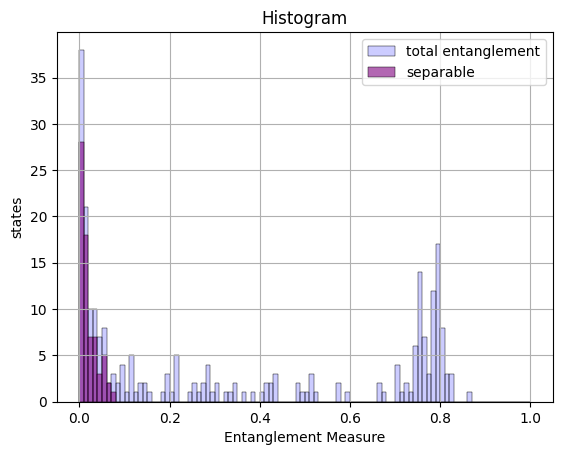

In [58]:
bin_width = 0.01
bins = np.arange(0, 1.01, bin_width)

# Create the histogram using seaborn
sns.histplot(real_entanglement, bins=bins, kde=False, edgecolor='black', color='blue', alpha=0.2,label='total entanglement')
#sns.histplot(w, bins=bins, kde=False, edgecolor='black', color='red', alpha=0.6,label='W')
#sns.histplot(ghz_local_op, bins=bins, kde=False, edgecolor='black', color='green', alpha=0.6,label='GHZ')
#sns.histplot(bipartite_entangled, bins=bins, kde=False, edgecolor='black', color='orange', alpha=0.6,label='bipartite entangled')
sns.histplot(separable, bins=bins, kde=False, edgecolor='black', color='purple', alpha=0.6,label='separable')
# Add labels and title
plt.xlabel('Entanglement Measure')
plt.ylabel('states')
plt.title('Histogram')
plt.legend()
# Show the plot
plt.grid(True)
plt.show()